<a href="https://colab.research.google.com/github/Sophinaz/PennyLane_Task/blob/main/Sophonias_PennyLane_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 78.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 82.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 123.6 MB/s eta 0:00:00


# Task 1: Create a Bell State Circuit
Build a quantum circuit that generates the Bell state



Use 2 qubits

Use qml.probs() to display the probability distribution

Bonus: visualize the statevector or show measurement samples

In [14]:
import pennylane as qml
import numpy as np

dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def bell_state_circuit():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.probs(wires=[0, 1])

@qml.qnode(dev)
def bell_state_samples():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.sample(wires=[0, 1])

probs = bell_state_circuit()
print("Probability distribution:")
print("P(|00⟩) =", probs[0])
print("P(|01⟩) =", probs[1])
print("P(|10⟩) =", probs[2])
print("P(|11⟩) =", probs[3])

samples = bell_state_samples(shots=1000)
print("\n 10 samples:")
print(samples[:10])

unique, counts = np.unique(samples, axis=0, return_counts=True)
print("\n Sample counts:")
for outcome, count in zip(unique, counts):
    print(f"Outcome {outcome}: {count} times")

Probability distribution:
P(|00⟩) = 0.4999999999999999
P(|01⟩) = 0.0
P(|10⟩) = 0.0
P(|11⟩) = 0.4999999999999999

 10 samples:
[[0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]]

 Sample counts:
Outcome [0 0]: 480 times
Outcome [1 1]: 520 times


# Task 2: Build a GHZ State for 3 Qubits
Construct a circuit that prepares a 3-qubit GHZ state:

Use Hadamard and CNOT gates

Measure using qml.probs(wires=[0, 1, 2])

Optional: extend to 4 qubits

In [ ]:
import pennylane as qml
import numpy as np

dev_3q = qml.device("default.qubit", wires=3)

@qml.qnode(dev_3q)
def ghz_3qubit_circuit():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    return qml.probs(wires=[0, 1, 2])

probs_3q = ghz_3qubit_circuit()
for i, prob in enumerate(probs_3q):
    state = format(i, '03b')  # Convert index to binary (e.g., 0 -> 000, 1 -> 001)
    print(f"P(|{state}⟩) = {prob:.4f}")

dev_4q = qml.device("default.qubit", wires=4)

@qml.qnode(dev_4q)
def ghz_4qubit_circuit():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 3])
    return qml.probs(wires=[0, 1, 2, 3])

probs_4q = ghz_4qubit_circuit()
print("\n4-Qubit GHZ State Probability Distribution (Optional):")
for i, prob in enumerate(probs_4q):
    state = format(i, '04b')  # Convert index to binary (e.g., 0 -> 0000)
    if prob > 0:
        print(f"P(|{state}⟩) = {prob:.4f}")

3-Qubit GHZ State Probability Distribution:
P(|000⟩) = 0.5000
P(|001⟩) = 0.0000
P(|010⟩) = 0.0000
P(|011⟩) = 0.0000
P(|100⟩) = 0.0000
P(|101⟩) = 0.0000
P(|110⟩) = 0.0000
P(|111⟩) = 0.5000

4-Qubit GHZ State Probability Distribution (Optional):
P(|0000⟩) = 0.5000
P(|1111⟩) = 0.5000


# Task 3: Rotation + Measurement Circuit
Design a single-qubit rotation circuit using RX, RY, or RZ gates.

Make the rotation angle a variable input

Return the expectation value of PauliZ

Plot how the output changes as you vary the input angle



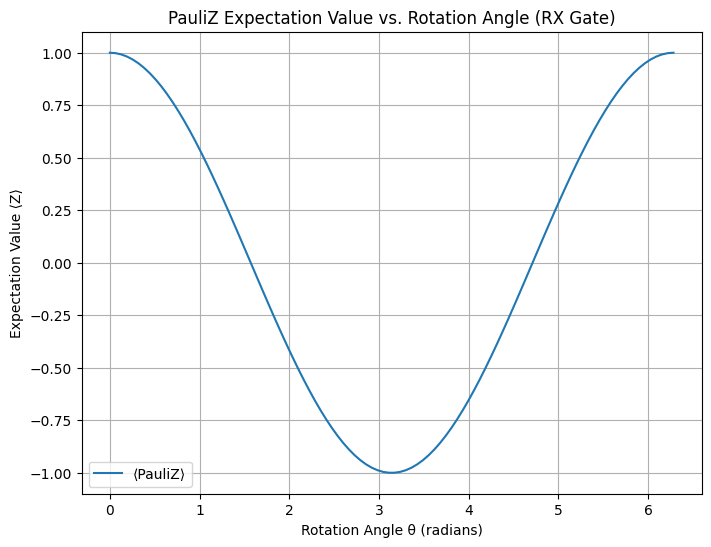

Example Expectation Values:
θ = 0.00 radians, ⟨Z⟩ = 1.0000
θ = 1.27 radians, ⟨Z⟩ = 0.2969
θ = 2.54 radians, ⟨Z⟩ = -0.8237
θ = 3.81 radians, ⟨Z⟩ = -0.7861
θ = 5.08 radians, ⟨Z⟩ = 0.3569


In [ ]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt

dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def rotation_circuit(theta):
    qml.RX(theta, wires=0)
    return qml.expval(qml.PauliZ(0))

angles = np.linspace(0, 2 * np.pi, 100)
expectations = [rotation_circuit(theta) for theta in angles]

plt.figure(figsize=(8, 6))
plt.plot(angles, expectations, label="⟨PauliZ⟩")
plt.xlabel("Rotation Angle θ (radians)")
plt.ylabel("Expectation Value ⟨Z⟩")
plt.title("PauliZ Expectation Value vs. Rotation Angle (RX Gate)")
plt.grid(True)
plt.legend()
plt.show()

print("Example Expectation Values:")
for theta, exp_val in zip(angles[::20], expectations[::20]):
    print(f"θ = {theta:.2f} radians, ⟨Z⟩ = {exp_val:.4f}")

## Task 4: Simple Variational Optimization
Create a cost function that depends on a gate parameter, and optimize it using PennyLane’s gradient descent optimizer.

Use a rotation gate like RX, and minimize expval(PauliZ)

Log or print cost at each step

Output the optimal parameter found

plot the cost function curve

Optimization Progress:
Step  1: Cost = 0.9928, theta = 0.1200
Step  2: Cost = 0.9897, theta = 0.1439
Step  3: Cost = 0.9851, theta = 0.1726
Step  4: Cost = 0.9787, theta = 0.2069
Step  5: Cost = 0.9694, theta = 0.2480
Step  6: Cost = 0.9562, theta = 0.2971
Step  7: Cost = 0.9374, theta = 0.3557
Step  8: Cost = 0.9109, theta = 0.4253
Step  9: Cost = 0.8738, theta = 0.5078
Step 10: Cost = 0.8224, theta = 0.6051
Step 11: Cost = 0.7526, theta = 0.7189
Step 12: Cost = 0.6596, theta = 0.8506
Step 13: Cost = 0.5395, theta = 1.0009
Step 14: Cost = 0.3908, theta = 1.1693
Step 15: Cost = 0.2157, theta = 1.3534
Step 16: Cost = 0.0221, theta = 1.5487
Step 17: Cost = -0.1769, theta = 1.7486
Step 18: Cost = -0.3660, theta = 1.9455
Step 19: Cost = -0.5319, theta = 2.1316
Step 20: Cost = -0.6670, theta = 2.3010
Step 21: Cost = -0.7702, theta = 2.4500
Step 22: Cost = -0.8451, theta = 2.5775
Step 23: Cost = -0.8973, theta = 2.6845
Step 24: Cost = -0.9327, theta = 2.7727
Step 25: Cost = -0.9563, theta = 

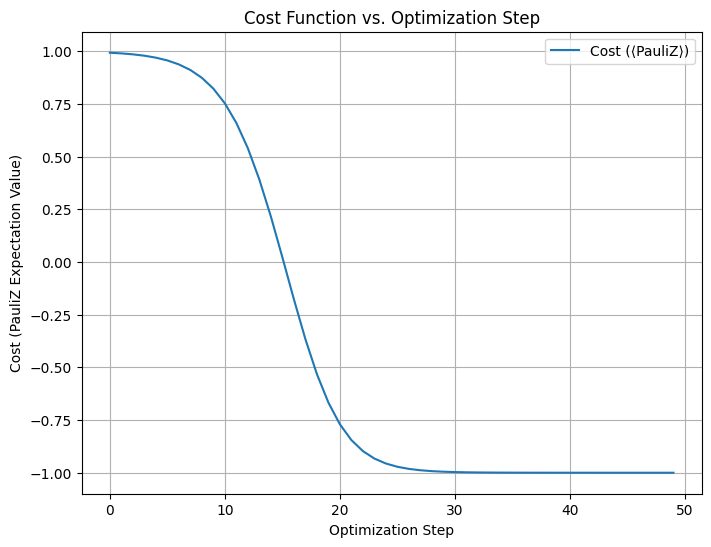

In [5]:
import pennylane as qml
import pennylane.numpy as np
import matplotlib.pyplot as plt

dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def cost(theta):
    qml.RX(theta, wires=0)
    return qml.expval(qml.PauliZ(0))

opt = qml.GradientDescentOptimizer(stepsize=0.2)
theta = np.array(0.1, requires_grad=True)
steps = 50
cost_history = []

print("Optimization Progress:")
for i in range(steps):
    theta = opt.step(cost, theta)
    current_cost = cost(theta)
    cost_history.append(current_cost)
    print(f"Step {i+1:2d}: Cost = {current_cost:.4f}, theta = {theta:.4f}")

print(f"\nOptimal parameter: theta = {theta:.4f}")
print(f"Final cost (PauliZ expectation): {cost(theta):.4f}")

plt.figure(figsize=(8, 6))
plt.plot(range(steps), cost_history, label="Cost (⟨PauliZ⟩)")
plt.xlabel("Optimization Step")
plt.ylabel("Cost (PauliZ Expectation Value)")
plt.title("Cost Function vs. Optimization Step")
plt.grid(True)
plt.legend()
plt.show()

# Task 5: Measurement Comparison
Build a 1- or 2-qubit circuit and compare results from:

qml.probs()

qml.sample()

qml.expval()

Explain how they differ in output and when you'd use each.

Discuss why probs() is deterministic but sample() is random.

In [13]:
import pennylane as qml
import pennylane.numpy as np

dev = qml.device("default.qubit", wires=2, shots=1000)

# Circuit for qml.probs()
@qml.qnode(dev)
def probs_circuit():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.probs(wires=[0, 1])

# Circuit for qml.sample()
@qml.qnode(dev)
def sample_circuit():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.sample(wires=[0, 1])

# Circuit for qml.expval()
@qml.qnode(dev)
def expval_circuit():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.expval(qml.PauliZ(0))

probs = probs_circuit()
samples = sample_circuit()
expval = expval_circuit()

print("qml.probs() output:")
for i, prob in enumerate(probs):
    state = format(i, '02b')
    print(f"P(|{state}⟩) = {prob:.4f}")

print("\nqml.sample() output (first 10 samples):")
print(samples[:10])

print("\nSample counts:")
unique, counts = np.unique(samples, axis=0, return_counts=True)
for outcome, count in zip(unique, counts):
    print(f"Outcome {outcome}: {count} times ({count/1000:.4f})")

print(f"\nqml.expval(PauliZ(0)) output: {expval:.4f}")

qml.probs() output:
P(|00⟩) = 0.4800
P(|01⟩) = 0.0000
P(|10⟩) = 0.0000
P(|11⟩) = 0.5200

qml.sample() output (first 10 samples):
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]

Sample counts:
Outcome [0 0]: 495 times (0.4950)
Outcome [1 1]: 505 times (0.5050)

qml.expval(PauliZ(0)) output: -0.0160
